<a href="https://colab.research.google.com/github/Charanvitha/AIML-2025/blob/main/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outlier Detection Code:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#create a synthetic dataset
np.random.seed(46)
data=np.random.normal(0,1,100)  #Normal distribution
outliers=np.random.uniform(5,10,5)  #Artificial outliers

In [ ]:
df = pd.DataFrame(data,columns=['Values'])
df.describe()

,Values
count,100.000000
mean,-0.066782
std,0.923463
min,-2.694205
25%,-0.566980
50%,-0.119917
75%,0.450853
max,2.161175


In [ ]:
#step 1:Detect Outliers using IQR method
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
#Identifying outliers based on IQR
outliers_iqr=df[(df['Values']<lower_bound) | (df['Values']>upper_bound)]

In [ ]:
#Step 2:Detect Outliers using Z-Score method
z_scores=stats.zscore(df['Values'])
outliers_zscore=df[np.abs(z_scores)>3]

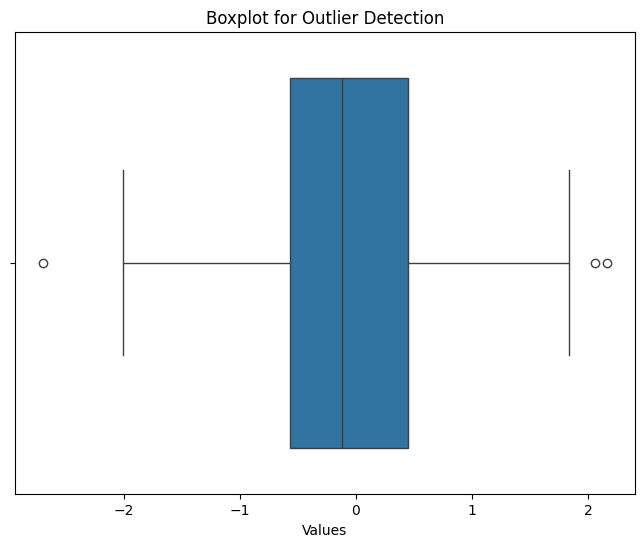

In [ ]:
#Step 3:Detect outliers using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Values'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
#Step 4:Handle Outliers
#Capping:Set outliers to the upper and lower bounds
df_capped=df.copy()
df_capped['Values']=np.clip(df_capped['Values'],lower_bound,upper_bound)

In [ ]:
#Removal:drop rows with outliers
df_removed=df.copy()
df_removed=df_removed[(df_removed['Values']>=lower_bound) & (df_removed['Values']<=upper_bound)]

In [ ]:
#Imputation:Replace outliers with the median
df_imputed=df.copy()
median_value=df['Values'].median()
df_imputed['Values']=np.where(np.abs(stats.zscore(df_imputed['Values']))>3,median_value,df_imputed['Values'])

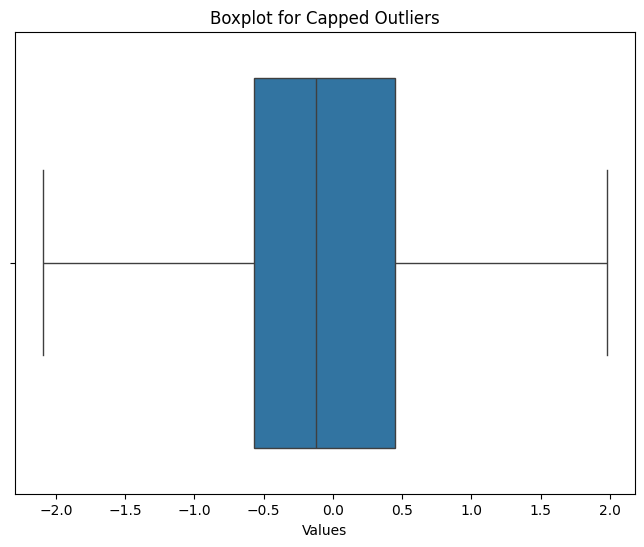

In [ ]:
#Step 5:Visualize handled data
#capped data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['Values'])
plt.title('Boxplot for Capped Outliers')
plt.show()